<a href="https://www.kaggle.com/code/phatnguyenn/ricegranding1?scriptVersionId=98969562" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
trainset='../input/ricegranding/rice grading/Rice_Image_Dataset'

In [4]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 18418 images belonging to 15 classes.
Found 2038 images belonging to 15 classes.


In [5]:
validation_set.class_indices

{'HUONG MUA': 0,
 'LHR': 1,
 'LONGLAI': 2,
 'NEPNGONG': 3,
 'ST25': 4,
 'THOMNHAT': 5,
 'THOMSUA': 6,
 'gao Ipsala': 7,
 'gao Jasmine': 8,
 'gao an': 9,
 'gao nhat': 10,
 'gao y': 11,
 'lucdo': 12,
 'lucvang': 13,
 'tainguyen': 14}

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(15,activation='softmax'))
model.summary()

2022-06-21 16:28:12.293292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-21 16:28:12.415126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-21 16:28:12.415926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-21 16:28:12.417498: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       7

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=100,verbose=1,validation_data=validation_set)

2022-06-21 16:28:16.531223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-06-21 16:28:19.061235: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


144/144 [==============================] - 159s 1s/step - loss: 1.5615 - accuracy: 0.4031 - val_loss: 0.8244 - val_accuracy: 0.6511
Epoch 2/100
144/144 [==============================] - 78s 539ms/step - loss: 0.6113 - accuracy: 0.7417 - val_loss: 0.5198 - val_accuracy: 0.8062
Epoch 3/100
144/144 [==============================] - 78s 540ms/step - loss: 0.3987 - accuracy: 0.8402 - val_loss: 0.5189 - val_accuracy: 0.8027
Epoch 4/100
144/144 [==============================] - 78s 541ms/step - loss: 0.2789 - accuracy: 0.8873 - val_loss: 0.3753 - val_accuracy: 0.8886
Epoch 5/100
144/144 [==============================] - 77s 535ms/step - loss: 0.2901 - accuracy: 0.8855 - val_loss: 0.2475 - val_accuracy: 0.8960
Epoch 6/100
144/144 [==============================] - 79s 549ms/step - loss: 0.1958 - accuracy: 0.9244 - val_loss: 0.2363 - val_accuracy: 0.9141
Epoch 7/100
144/144 [==============================] - 77s 538ms/step - loss: 0.1712 - accuracy: 0.9350 - val_loss: 0.2020 - val_accuracy:

In [8]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 18418 images belonging to 15 classes.
Found 2038 images belonging to 15 classes.


In [9]:
model.save('gao1.h5')

In [10]:
model1=load_model('gao1.h5')

In [11]:
label = ['gao HUONG MUA ','gao LHR','gao LONGLAI','gao NEPNGONG','gao ST25','gao THOM NHAT','gao THOM SUA','gao Ipsala','gao jasmine','gao An','gao Nhat','gao y','gao luc do', 'gao luc vang','gao tai nguyen']

gao tai nguyen


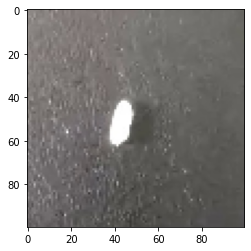

In [12]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('../input/ricegranding/rice grading/Rice test/tainguyen/TAINGUYEN_10.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])